<h1> Draft Master Thesis </h1>
Made by Jakob Lindstrøm and Marcus Hjertaas
<br>
<br>
This notebook shows how far we have come with our current work towards the master thesis, in regards of code. We are so to speak finished with data retrieval, Markowitz-algorithm and OGA-model. 
<br>
<br>
Exploratory data analysis, reinforcement learning algorithm and a comprehensive result (tables and plot) still remains. 

<h2> Current Content </h2>
We have retrieved data from a stock pool. We have traded thoose stocks with an Markowitz algorithm. We have performed the OGA model to look for allocation and selection effects. Where the benchmark is MPT and our experimental portfolio is a naive portfolio with equal weights (becuase RL is not finished). Lastly we show some plot to visualize how our result section might look like. 

<h2> Full access </h2>
To get full access to all code and modules; contact Jakob Lindstrøm. 

<h2> 1. Import libraries </h2>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import yfinance as yf

from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import minimize

from Data_Retriever import DataRetriever as DatRet
from Markowitz_PT import MarkowitzPT as MPT
from Menchero_OGA import MencheroOGA as MOGA

<h2> 2. Define experimental variables </h2>

In [83]:
# Define number of trades
trading_n = 40

# Define number of days used to calcualte MPT
history_usage = 100

num_sectors = 5
num_stocks_peer_sector = 4

In [28]:
# Defining stock pool
ticker_df =  pd.DataFrame()
ticker_df["Petroleum"] = ["EQNR.OL", "AKRBP.OL", "SUBC.OL", "BWO.OL",]
ticker_df["Seafood (food)"] = ["ORK.OL", "MOWI.OL", "SALM.OL", "LSG.OL"]
# ticker_df["Materials"] = ["NHY.OL", "YAR.OL", "RECSI.OL", "BRG.OL"]
ticker_df["Technologies"] = ["TEL.OL", "NOD.OL", "ATEA.OL", "BOUV.OL"]
ticker_df["Financial"] = ["STB.OL", "DNB.OL", "GJF.OL", "AKER.OL"]
ticker_df["Shipping"] = ["WAWI.OL", "SNI.OL", "BELCO.OL", "ODF.OL"]
ticker_df

,Petroleum,Seafood (food),Technologies,Financial,Shipping
0,EQNR.OL,ORK.OL,TEL.OL,STB.OL,WAWI.OL
1,AKRBP.OL,MOWI.OL,NOD.OL,DNB.OL,SNI.OL
2,SUBC.OL,SALM.OL,ATEA.OL,GJF.OL,BELCO.OL
3,BWO.OL,LSG.OL,BOUV.OL,AKER.OL,ODF.OL


In [178]:
esg_scores = [36.6, 35.3, 17.9, 18, 
              18, 21.2, 18.7, 29.2, 
            #   15.7, 25.6, 25.6, 18.4, 
              19.8, 13.8, 18.1, 19, 
              17.2, 14, 17.2, 19.5, 
              19.7, 21.2, 26.8, 19.3]

<h2> 3. Retrieve data </h2>

In [ ]:
# Retrieve data from yf API: y-m-d
data = DatRet(ticker_df, "2013-01-01", "2024-01-01")

# In function below, set log=True to check for data availability
data.retrieve_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

EQNR.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

AKRBP.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

SUBC.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

BWO.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

ORK.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

MOWI.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

SALM.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

LSG.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

TEL.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

NOD.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

ATEA.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

BOUV.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

STB.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

DNB.OL with 5522 observations


GJF.OL with 5522 observations


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AKER.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

WAWI.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

SNI.OL with 5522 observations



[*********************100%***********************]  1 of 1 completed

BELCO.OL with 5522 observations


ODF.OL with 5522 observations


'--Data retrieved successfully--'

<h2> 4. Frequency trading using MPT </h2>

In [35]:
# Generate benchmark weights thorugh MPT using Sharpe ratio
benchmark = MPT(data.returns, history_usage, trading_n)
# IMPORTANT: In order to see  the effect of the weights, algo exclude last observation from optimization
benchmark.frequency_optimizing()

--Frequency trading using MPT successfully performed--


<h2> 5. Conduct performance analysis </h2>

In [45]:
# Naive experimental portfolio
ew = [np.repeat(1/20, 20) for i in range(trading_n)]
# Analysis 
analysis = MOGA(data.returns, benchmark.frequency_weights, ew)
# Frequency analysis
analysis.frequency_analyser()

--Frequency analysis performed succesfully--


<h2> X. Ad-hoc result analysis </h2> 

<h3> X.1 Weights and returns </h3>

In [65]:
#Manual fixing weights
bw = [benchmark.frequency_weights[i][0] for i in range(trading_n)]

# Manual fixing returns
return_array =  [pd.Series(stock) for sector in data.returns for stock in sector]
return_df = pd.DataFrame(return_array)
return_tdf = return_df.T
ret = return_tdf[-trading_n:]+1

<h3> X.2 Calculating returns and active return </h3>

In [66]:
# Replicate historic geometric returns
bg = np.cumprod([bw[i]@ret.iloc[i] for i in range(trading_n)])
eg = np.cumprod([ew[i]@ret.iloc[i] for i in range(trading_n)])

# Active return
active_return = np.cumprod(analysis.allocation_effects*analysis.selection_effects)

<h3> X.3 Calculations on allocation and selection effects </h3>

In [150]:
# Recollect effects from sector level to portfolio level
port_all = analysis.allocation_effects.reshape(-1,num_sectors)
port_all_prod = [np.prod(port_all[i]) for i in range(len(port_all))]

port_sel = analysis.selection_effects.reshape(-1,num_sectors)
port_sel_prod = [np.prod(port_sel[i]) for i in range(len(port_sel))]

# Cumulative product of  active return, calcualted by effects
total = np.cumprod([port_sel_prod[i]*port_all_prod[i] for i in range(trading_n)])

<h3> X.4 ESG score calculations  </h3>

In [194]:
average_esg = [bw[i]@esg_scores for i in range(trading_n)]

<h1> Plot and Results </h1>
<h3> Quality Control Plot </h3>

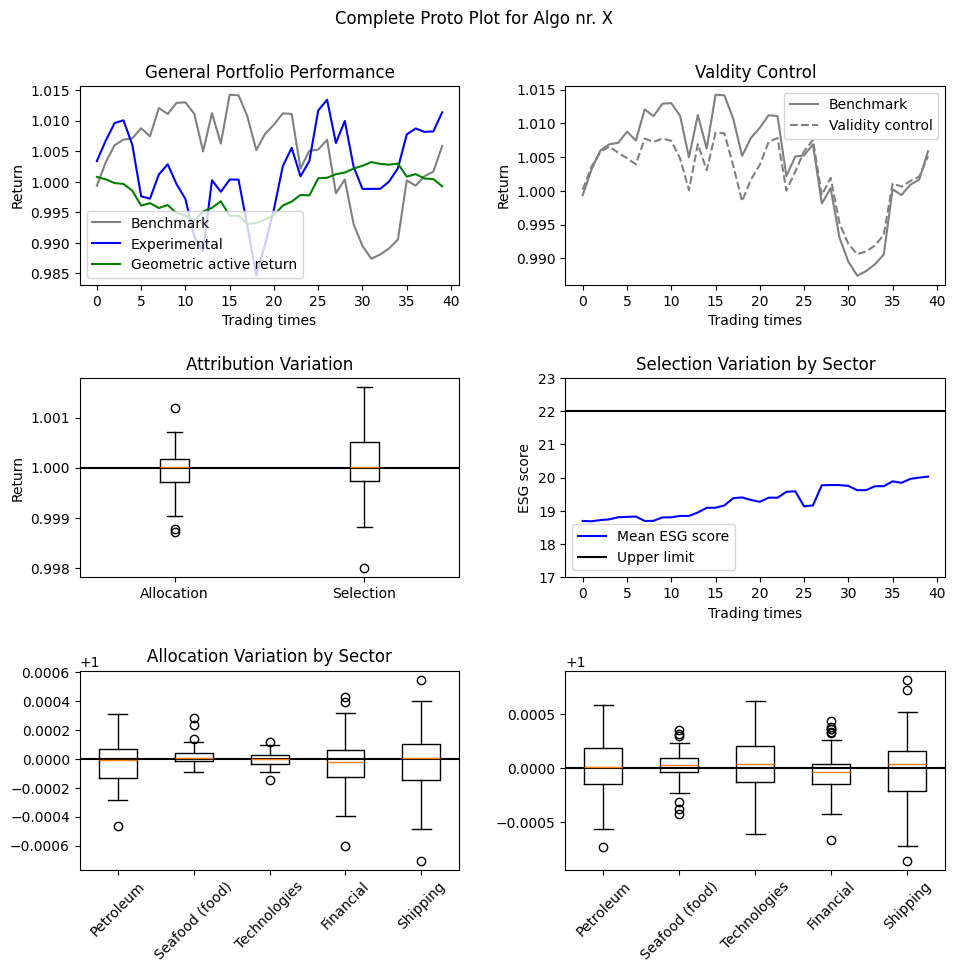

In [222]:
bigfig, ax = plt.subplots(3,2,figsize=(10,10))
ax[0,0].plot(bg, color="grey", label="Benchmark")
ax[0,0].plot(eg, color="blue", label="Experimental")
ax[0,0].plot(total, color="green", label= "Geometric active return")
ax[0,0].set_ylabel("Return")
ax[0,0].set_xlabel("Trading times")
ax[0,0].set_title('General Portfolio Performance')
ax[0,0].legend()

ax[0,1].plot(bg, color="grey", label="Benchmark")
ax[0,1].plot(bg*total, color="grey", linestyle="--", label="Validity control")
ax[0,1].set_ylabel("Return")
ax[0,1].set_xlabel("Trading times")
ax[0,1].set_title('Valdity Control')
ax[0,1].legend()

data_arrays = [port_all_prod, port_sel_prod]
data_labels = ["Allocation", "Selection"]
ax[1,0].boxplot(data_arrays, tick_labels=data_labels)
ax[1,0].axhline(y=1, color="black")
ax[1,0].set_ylabel("Return")
ax[1,0].set_title('Attribution Variation')
# ax[1,0].legend()

ax[1,1].plot(average_esg, color="blue", label="Mean ESG score")
ax[1,1].axhline(y=22, color='black', linestyle='-', label="Upper limit")  
ax[1,1].set_ylim(17,23)
ax[1,1].set_ylabel("ESG score")
ax[1,1].set_xlabel("Trading times")
ax[1, 1].set_title('ESG Score Development')
ax[1,1].legend()

ax[2,0].boxplot(port_all)
ax[2,0].axhline(y=1, color="black")
ax[2,0].set_xticklabels(ticker_df.columns, rotation=45) 
ax[2,0].set_title('Allocation Variation by Sector')


ax[2,1].boxplot(port_sel)
ax[2,1].axhline(y=1, color="black")
ax[2,1].set_xticklabels(ticker_df.columns, rotation=45) 
ax[1, 1].set_title('Selection Variation by Sector')

plt.suptitle('Complete Proto Plot for Algo nr. X', fontsize=12)
bigfig.tight_layout(pad=2.0)
# plt.subplots_adjust(bottom=0.22)  
plt.show()
# plt.close()


Here one can observe that the active return calculated from effects is almost equal to the benchmark. I believe the problems of not following each other perfectly occurs from rounding-challenges. However, this will be checked. 

Here we can see that the average allocation and selection effect is almost equal. 

Here we can see  allocation effects on sector level.

Here we can see selection effects from portfolio breaken down to sector level